# Tokyo Olympics 2021 - Exploratory Data Analysis


## Introduction

The 2020 Summer Olympics, officially the Games of the XXXII Olympiad and branded as Tokyo 2020, was an international multi-sport event held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 21 July.

## Purpose

To perform data analysis on Tokyo Olympics 2021. The analysis uses libraries of python like numpy, pandas, matplotlib, seaborn and geopandas.

## Dataset

We have 5 input dataset in the form of XLSX
1. Athletes.xlsx
    - Contains the data about athelete name, country they belong to and the game they are playing.
2. Coaches.xlsx
    - Contains the data about coach, country they belong to, game and the event.
3. EntriesGender.xlsx
    - Contains the information about the game and number of males and females which are participating in that game.
4. Medals.xlsx
    - Contains the data pertaining to countries, medals they won and their overall scoreboard.
5. Teams.xlsx
    - Contains the data related to team, game, coutry and the event

The data was obtained from __[Kaggle](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo)__

## Questions

I am trying to analyze the Tokyo Olympics 2021 dataset and answer a few of the questions like below:
# Update

------------------------------------------------------------------------------------------------------------------

**Install packages**

In [1]:
!pip install geopandas
!pip install wordcloud

**Import packages**

In [79]:
import pandas as pd
import numpy as np

import os
import seaborn as sb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import geopandas
from matplotlib import cm
import plotly as py
import plotly.graph_objs as go


**Import Data**

In [2]:
athletes = pd.read_excel('./input/Athletes.xlsx', index_col=0)
coaches = pd.read_excel('./input/Coaches.xlsx', index_col=0)
e_gender = pd.read_excel('./input/EntriesGender.xlsx', index_col=0)
medals = pd.read_excel('./input/Medals.xlsx', index_col=0)
teams = pd.read_excel('./input/Teams.xlsx', index_col=0)

/Users/anonymous/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


**Data Cleaning**

In [3]:
athletes['NOC'] = athletes['NOC'].replace('Democratic Republic of the Congo', 'Democratic republic of the congo')
athletes['NOC'] = athletes['NOC'].replace('United Republic of Tanzania', 'Tanzania')
athletes['NOC'] = athletes['NOC'].replace('People\'s Republic of China', 'China')
athletes['NOC'] = athletes['NOC'].replace('Islamic Republic of Iran', 'Iran')
athletes['NOC'] = athletes['NOC'].replace('ROC', 'Russia')


# Athletes count by country
athletes_by_country = athletes.groupby('NOC').count().reset_index()
athletes_by_country.columns = ['country', 'count']
athletes_by_country = athletes_by_country.sort_values('count', ascending=False)


**Visualization of athletes count by country**

Text(0.5, 1.0, 'Number of Athletes by Country')

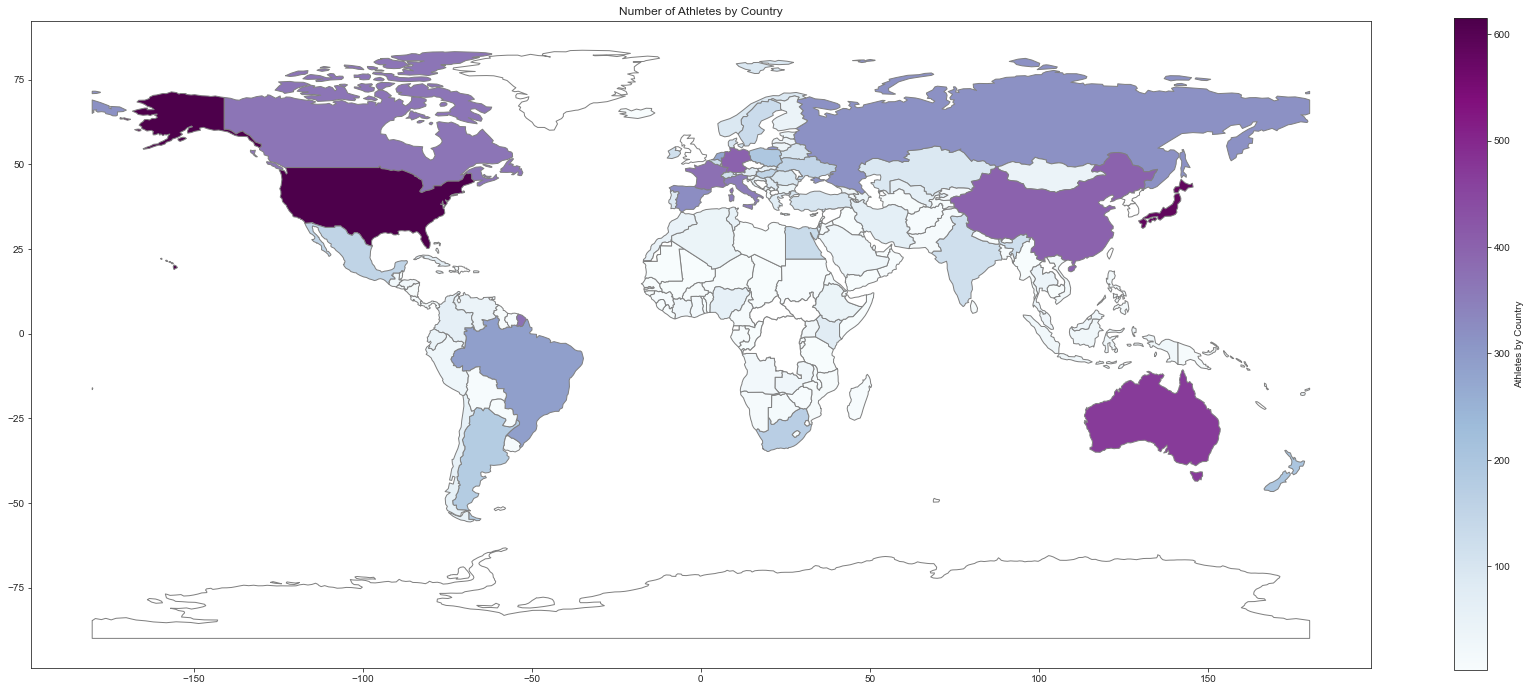

In [4]:
# Geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ath_country = world.merge(athletes_by_country, how = 'left', left_on=['name'], right_on=['country'])

# World Map
sb.set_style('ticks')
ath_country.plot('count', figsize=(30, 12), legend=True, edgecolor='gray', legend_kwds={'label': 'Athletes by Country'}, cmap='BuPu', missing_kwds={'color': 'white'})
plt.title('Number of Athletes by Country')


From above world map, based on color opacity we can conclude that, maximum number of athletes were from USA.

**Bar plot of Athletes number country wise**

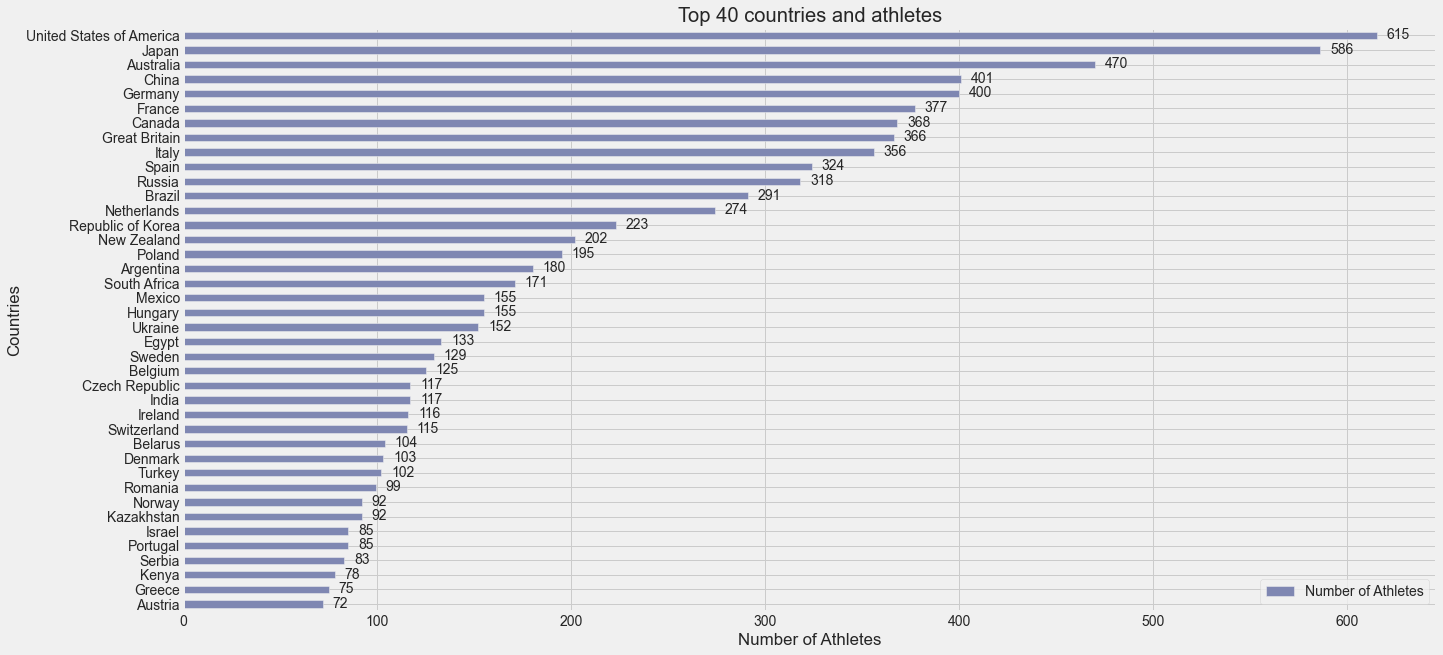

In [16]:
matplotlib.style.use('fivethirtyeight')
b_data = pd.DataFrame({'count': athletes_by_country['count'].values}, index = athletes_by_country['country']).head(40).sort_values(by='count', ascending=True)
ax = b_data.plot.barh(color='#7f87b2')
ax.set_title('Top 40 countries and athletes')
ax.set_xlabel('Number of Athletes')
ax.set_ylabel('Countries')
ax.figure.set_size_inches((20,10))
ax.legend(['Number of Athletes'])

for p in ax.patches:
    ax.annotate(p.get_width(),(p.get_width()+5,p.get_y()))

We can see that USA has the maximum number of athletes participating in the olympics.

**Games Distribution based on Gender**

In [68]:
# !pip install plotly

     |████████████████████████████████| 23.9 MB 5.4 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 0.26.1 requires graphviz, which is not installed.


In [156]:
# e_gender.loc[:,['Female', 'Male', 'Total']] = entries_gender.loc[:,['Female', 'Male', 'Total']].astype(int)
e_gender['discipline'] = e_gender.index
e_gender['f_ratio'] = e_gender['Female'] / e_gender['Total']
e_gender['m_ratio'] = e_gender['Male'] / e_gender['Total']

fig = go.Figure()
fig.add_trace(
    go.Bar(
        y=e_gender.discipline,
        x=e_gender.f_ratio,
        orientation='h',
        name='Females'
    )
)
fig.add_trace(
    go.Bar(
        y=e_gender.discipline,
        x=e_gender.m_ratio,
        orientation='h',
        name='Males'
    )
)

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))
fig.update_layout(
    title = 'Games Distribution based on gender',
    template = template,
    barmode='stack', 
    autosize=False,
    width=680,
    height=900,
    margin=dict(
      l=150,
      r=100,
       b=30,
       t=100,
       pad=4
    )
)

fig.layout.xaxis.tickformat = ',.0%'
fig.show()


**Participation of players in different games**

In [222]:
discipline_counts=athletes['Discipline'].value_counts().sort_values(ascending=True)
fig = px.histogram(
    y=discipline_counts.keys(),
    x=discipline_counts.values,
    height=1000,
    title='Participation of players in different games',
    color_discrete_sequence=['deepskyblue']
)
fig.update_layout(
    xaxis_title_text = 'Total player count',
    yaxis_title_text = 'Name of the game'
)
fig.show()